In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from scipy import stats

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
df = pd.read_csv('/kaggle/input/housedata/data.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (4600, 18)

First few rows:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print("="*80)
print("INITIAL DATA EXPLORATION")
print("="*80)

print(f"\n1. Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

print("\n2. Column Names and Types:")
print(df.dtypes)

print("\n3. Dataset Information:")
df.info()

print("\n4. First 5 rows:")
display(df.head())

print("\n5. Last 5 rows:")
display(df.tail())

INITIAL DATA EXPLORATION

1. Dataset Shape: 4600 rows, 18 columns

2. Column Names and Types:
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

3. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA



5. Last 5 rows:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [4]:
print("="*80)
print("STATISTICAL SUMMARY")
print("="*80)

print("\nDescriptive Statistics:")
display(df.describe())

print("\nDescriptive Statistics (All columns including object types):")
display(df.describe(include='all'))

STATISTICAL SUMMARY

Descriptive Statistics:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000



Descriptive Statistics (All columns including object types):


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


In [5]:
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
    by='Missing_Count', ascending=False
)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Column'], missing_df['Missing_Percentage'])
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.title('Missing Values Percentage by Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in the dataset!")

MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!


In [6]:
print("="*80)
print("DUPLICATE VALUES CHECK")
print("="*80)

duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")
    print("\nRemoving duplicates...")
    df = df.drop_duplicates()
    print(f"New shape after removing duplicates: {df.shape}")
else:
    print("✓ No duplicate rows found!")

DUPLICATE VALUES CHECK

Number of duplicate rows: 0
✓ No duplicate rows found!


In [7]:
print("="*80)
print("DATA TYPES AND UNIQUE VALUES")
print("="*80)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  - Data Type: {df[col].dtype}")
    print(f"  - Unique Values: {df[col].nunique()}")
    print(f"  - Missing Values: {df[col].isnull().sum()}")
    
    if df[col].nunique() < 20:
        print(f"  - Values: {df[col].unique()}")

DATA TYPES AND UNIQUE VALUES

date:
  - Data Type: object
  - Unique Values: 70
  - Missing Values: 0

price:
  - Data Type: float64
  - Unique Values: 1741
  - Missing Values: 0

bedrooms:
  - Data Type: float64
  - Unique Values: 10
  - Missing Values: 0
  - Values: [3. 5. 4. 2. 6. 7. 9. 1. 8. 0.]

bathrooms:
  - Data Type: float64
  - Unique Values: 26
  - Missing Values: 0

sqft_living:
  - Data Type: int64
  - Unique Values: 566
  - Missing Values: 0

sqft_lot:
  - Data Type: int64
  - Unique Values: 3113
  - Missing Values: 0

floors:
  - Data Type: float64
  - Unique Values: 6
  - Missing Values: 0
  - Values: [1.5 2.  1.  2.5 3.  3.5]

waterfront:
  - Data Type: int64
  - Unique Values: 2
  - Missing Values: 0
  - Values: [0 1]

view:
  - Data Type: int64
  - Unique Values: 5
  - Missing Values: 0
  - Values: [0 4 1 2 3]

condition:
  - Data Type: int64
  - Unique Values: 5
  - Missing Values: 0
  - Values: [3 5 4 2 1]

sqft_above:
  - Data Type: int64
  - Unique Values: 511
  

In [8]:
print("="*80)
print("FEATURE SEPARATION")
print("="*80)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols)

FEATURE SEPARATION

Numerical columns (13):
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

Categorical columns (5):
['date', 'street', 'city', 'statezip', 'country']


In [9]:
print("="*80)
print("HANDLING MISSING VALUES")
print("="*80)

# For numerical columns: fill with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled {col} with median: {median_val}")

# For categorical columns: fill with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled {col} with mode: {mode_val}")

print("\n✓ All missing values handled!")
print(f"Remaining missing values: {df.isnull().sum().sum()}")


HANDLING MISSING VALUES

✓ All missing values handled!
Remaining missing values: 0


OUTLIERS DETECTION - VISUALIZATION


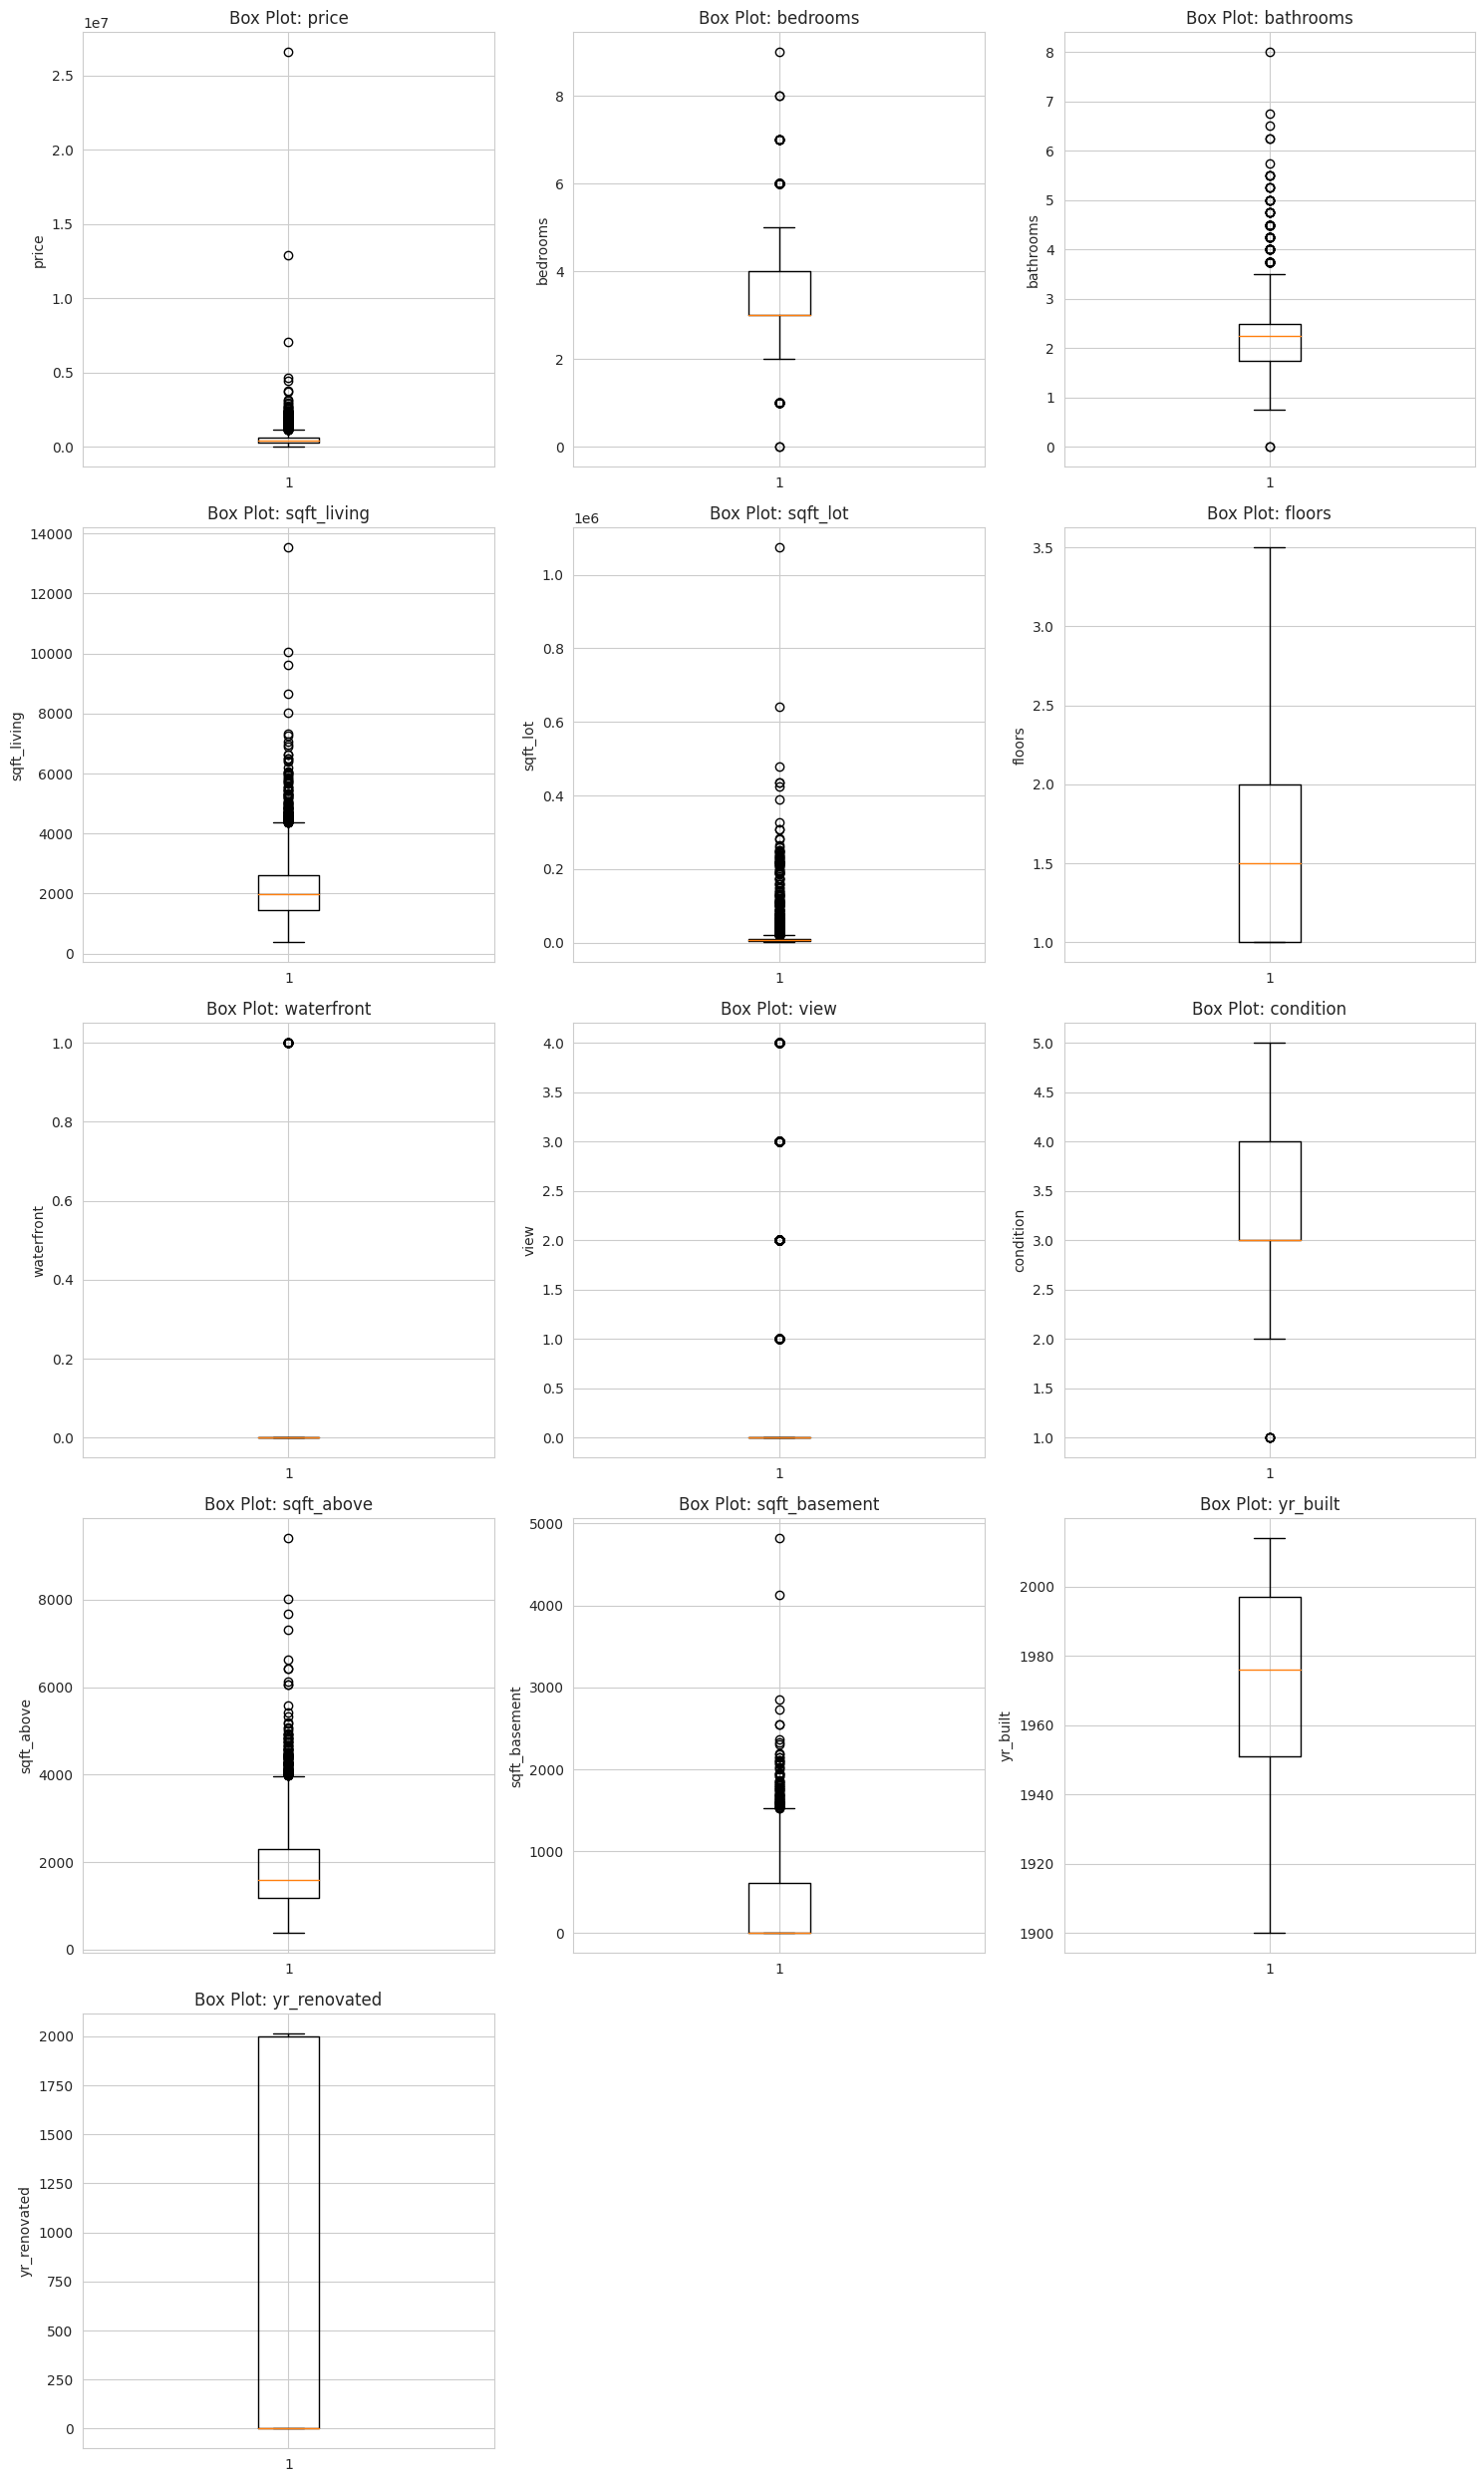

In [10]:
print("="*80)
print("OUTLIERS DETECTION - VISUALIZATION")
print("="*80)

# Create box plots for numerical columns
num_plots = len(numerical_cols)
num_rows = (num_plots + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_ylabel(col)

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
print("="*80)
print("OUTLIERS DETECTION - IQR METHOD")
print("="*80)

outliers_info = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = len(outliers)
    
    outliers_info[col] = {
        'count': outliers_count,
        'percentage': (outliers_count / len(df)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"\n{col}:")
    print(f"  - Outliers: {outliers_count} ({outliers_info[col]['percentage']:.2f}%)")
    print(f"  - Lower Bound: {lower_bound:.2f}")
    print(f"  - Upper Bound: {upper_bound:.2f}")

OUTLIERS DETECTION - IQR METHOD

price:
  - Outliers: 240 (5.22%)
  - Lower Bound: -175256.25
  - Upper Bound: 1153093.75

bedrooms:
  - Outliers: 118 (2.57%)
  - Lower Bound: 1.50
  - Upper Bound: 5.50

bathrooms:
  - Outliers: 141 (3.07%)
  - Lower Bound: 0.62
  - Upper Bound: 3.62

sqft_living:
  - Outliers: 129 (2.80%)
  - Lower Bound: -280.00
  - Upper Bound: 4360.00

sqft_lot:
  - Outliers: 541 (11.76%)
  - Lower Bound: -4000.00
  - Upper Bound: 20002.00

floors:
  - Outliers: 0 (0.00%)
  - Lower Bound: -0.50
  - Upper Bound: 3.50

waterfront:
  - Outliers: 33 (0.72%)
  - Lower Bound: 0.00
  - Upper Bound: 0.00

view:
  - Outliers: 460 (10.00%)
  - Lower Bound: 0.00
  - Upper Bound: 0.00

condition:
  - Outliers: 6 (0.13%)
  - Lower Bound: 1.50
  - Upper Bound: 5.50

sqft_above:
  - Outliers: 116 (2.52%)
  - Lower Bound: -475.00
  - Upper Bound: 3965.00

sqft_basement:
  - Outliers: 82 (1.78%)
  - Lower Bound: -915.00
  - Upper Bound: 1525.00

yr_built:
  - Outliers: 0 (0.00%)
  

In [12]:
print("="*80)
print("OUTLIERS DETECTION - Z-SCORE METHOD")
print("="*80)

z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers_zscore = (z_scores > 3).sum(axis=0)

print("\nOutliers detected using Z-score (threshold=3):")
for col, count in zip(numerical_cols, outliers_zscore):
    print(f"  {col}: {count} outliers")

OUTLIERS DETECTION - Z-SCORE METHOD

Outliers detected using Z-score (threshold=3):
  price: 34 outliers
  bedrooms: 19 outliers
  bathrooms: 27 outliers
  sqft_living: 50 outliers
  sqft_lot: 78 outliers
  floors: 2 outliers
  waterfront: 33 outliers
  view: 186 outliers
  condition: 6 outliers
  sqft_above: 53 outliers
  sqft_basement: 46 outliers
  yr_built: 0 outliers
  yr_renovated: 0 outliers


In [13]:
print("="*80)
print("HANDLING OUTLIERS - CAPPING METHOD")
print("="*80)

df_cleaned = df.copy()

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    
print("✓ Outliers handled using capping method!")

HANDLING OUTLIERS - CAPPING METHOD
✓ Outliers handled using capping method!


UNIVARIATE ANALYSIS - DISTRIBUTIONS


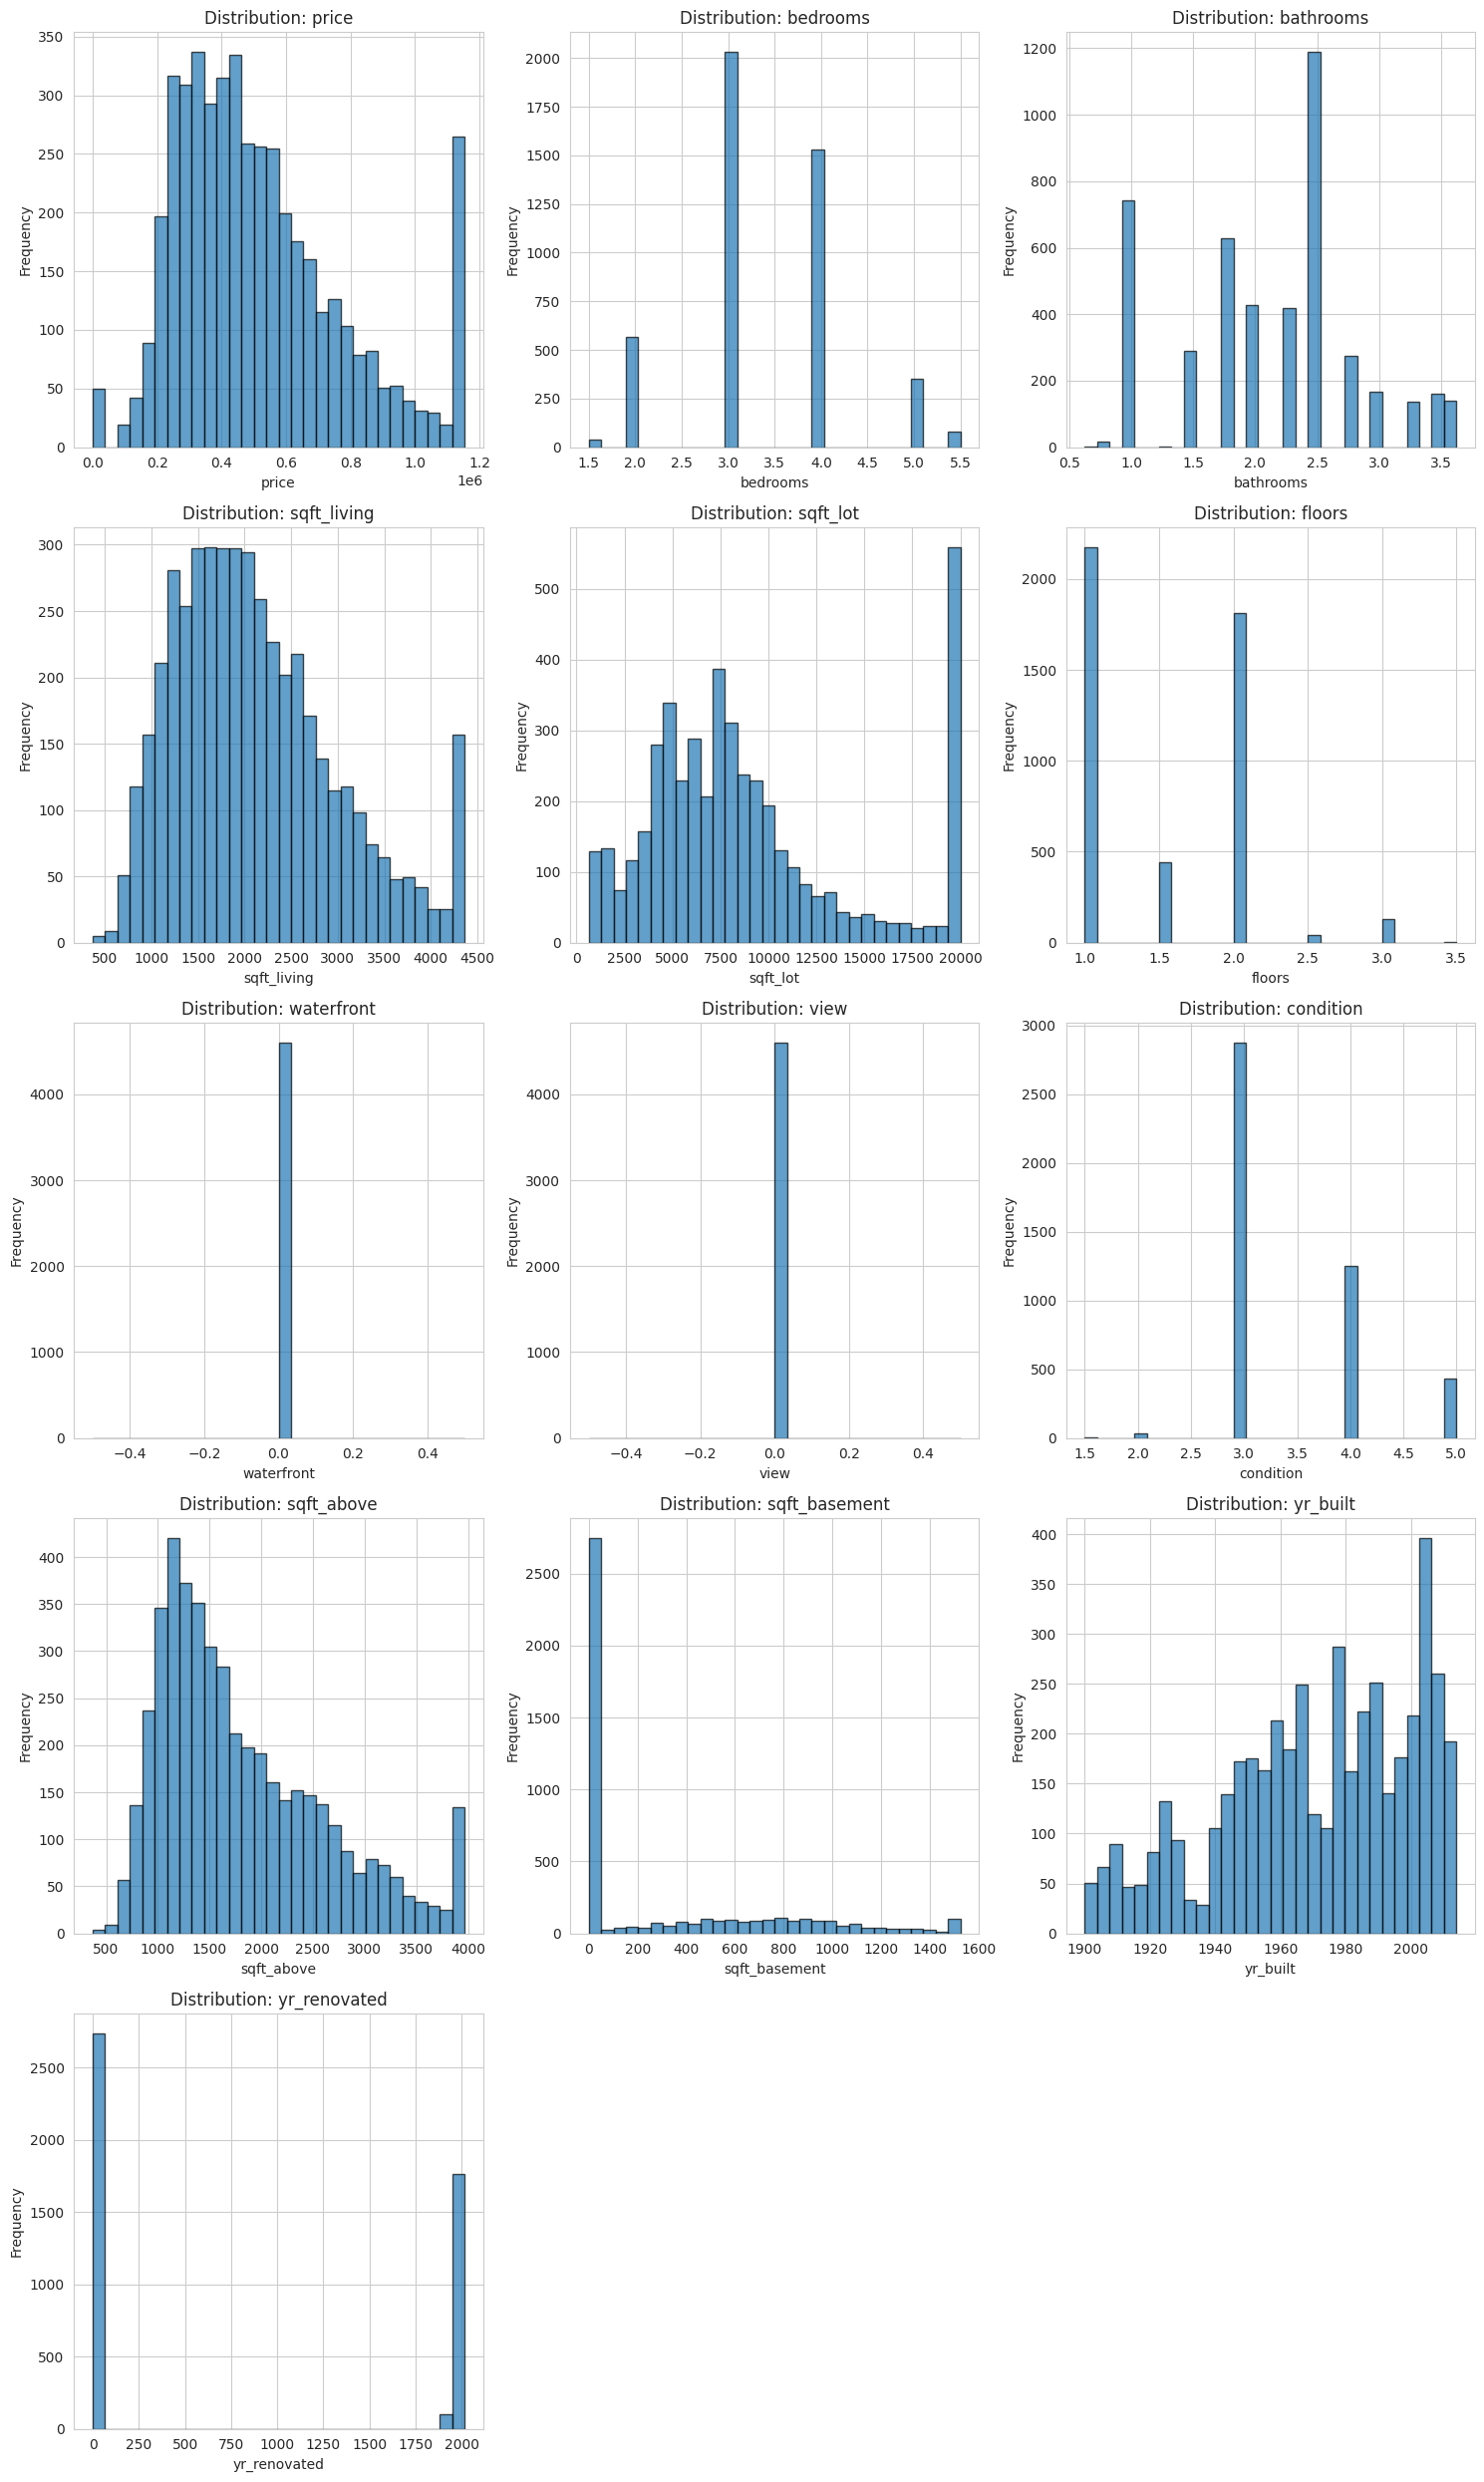

In [14]:
print("="*80)
print("UNIVARIATE ANALYSIS - DISTRIBUTIONS")
print("="*80)

num_plots = len(numerical_cols)
num_rows = (num_plots + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df_cleaned[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

CORRELATION ANALYSIS

Correlation Matrix:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.336636,0.504113,0.663015,0.155890,0.289390,NaN,NaN,0.048565,0.572611,0.279015,0.041708,-0.059746
bedrooms,0.336636,1.000000,0.542420,0.619916,0.213088,0.181811,NaN,NaN,0.022355,0.501552,0.323674,0.153701,-0.066400
bathrooms,0.504113,0.542420,1.000000,0.748138,0.133726,0.505157,NaN,NaN,-0.125365,0.674544,0.261789,0.490202,-0.230709
sqft_living,0.663015,0.619916,0.748138,1.000000,0.369314,0.357140,NaN,NaN,-0.062817,0.868918,0.401282,0.304907,-0.131505
sqft_lot,0.155890,0.213088,0.133726,0.369314,1.000000,-0.161186,NaN,NaN,0.043134,0.351269,0.088008,0.066608,0.018314
floors,0.289390,0.181811,0.505157,0.357140,-0.161186,1.000000,NaN,NaN,-0.276648,0.541050,-0.268722,0.467481,-0.233996
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.048565,0.022355,-0.125365,-0.062817,0.043134,-0.276648,NaN,NaN,1.000000,-0.184583,0.213174,-0.402206,-0.188204
sqft_above,0.572611,0.501552,0.674544,0.868918,0.351269,0.541050,NaN,NaN,-0.184583,1.000000,-0.089467,0.425725,-0.167173


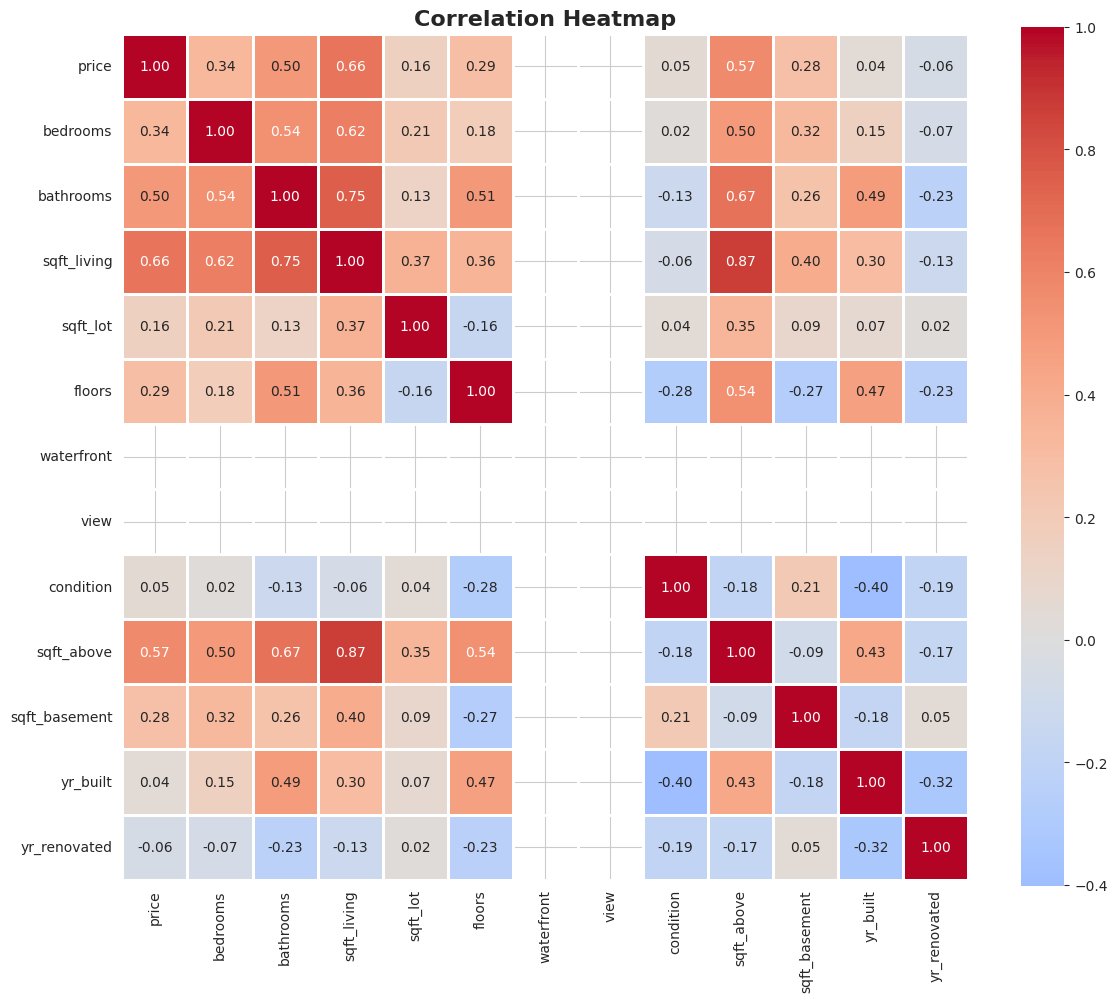

In [15]:
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

print("\nCorrelation Matrix:")
display(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

TARGET VARIABLE IDENTIFICATION

Target Variable: price
Target Data Type: float64

Target Statistics:


count    4.600000e+03
mean     5.169933e+05
std      2.614716e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      1.153094e+06
Name: price, dtype: float64

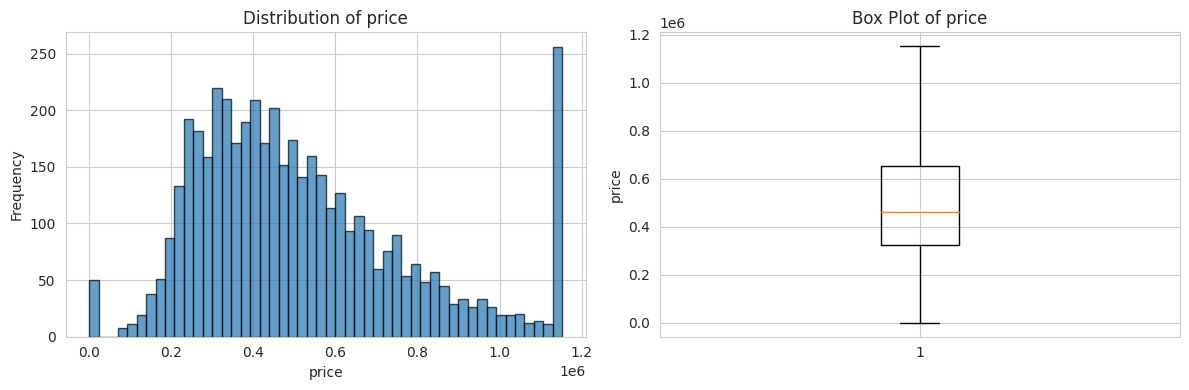

In [16]:
print("="*80)
print("TARGET VARIABLE IDENTIFICATION")
print("="*80)

target_col = 'price' if 'price' in df_cleaned.columns else df_cleaned.columns[-1]

print(f"\nTarget Variable: {target_col}")
print(f"Target Data Type: {df_cleaned[target_col].dtype}")
print(f"\nTarget Statistics:")
display(df_cleaned[target_col].describe())

# Plot target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_cleaned[target_col], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel(target_col)
plt.ylabel('Frequency')
plt.title(f'Distribution of {target_col}')

plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned[target_col])
plt.ylabel(target_col)
plt.title(f'Box Plot of {target_col}')

plt.tight_layout()
plt.show()


In [17]:
print("="*80)
print("ENCODING CATEGORICAL VARIABLES")
print("="*80)

df_encoded = df_cleaned.copy()

# One-hot encoding for categorical variables
if len(categorical_cols) > 0:
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
    print(f"\n✓ Encoded {len(categorical_cols)} categorical columns")
    print(f"New shape after encoding: {df_encoded.shape}")
else:
    print("\n✓ No categorical variables to encode")

print(f"\nFinal columns: {df_encoded.columns.tolist()}")

ENCODING CATEGORICAL VARIABLES

✓ Encoded 5 categorical columns
New shape after encoding: (4600, 4725)

Final columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'date_2014-05-03 00:00:00', 'date_2014-05-04 00:00:00', 'date_2014-05-05 00:00:00', 'date_2014-05-06 00:00:00', 'date_2014-05-07 00:00:00', 'date_2014-05-08 00:00:00', 'date_2014-05-09 00:00:00', 'date_2014-05-10 00:00:00', 'date_2014-05-11 00:00:00', 'date_2014-05-12 00:00:00', 'date_2014-05-13 00:00:00', 'date_2014-05-14 00:00:00', 'date_2014-05-15 00:00:00', 'date_2014-05-16 00:00:00', 'date_2014-05-17 00:00:00', 'date_2014-05-18 00:00:00', 'date_2014-05-19 00:00:00', 'date_2014-05-20 00:00:00', 'date_2014-05-21 00:00:00', 'date_2014-05-22 00:00:00', 'date_2014-05-23 00:00:00', 'date_2014-05-24 00:00:00', 'date_2014-05-25 00:00:00', 'date_2014-05-26 00:00:00', 'date_2014-05-27 00:00:00', 'date_2014-05-2

In [18]:
print("="*80)
print("TARGET VARIABLE ANALYSIS")
print("="*80)

if df_encoded[target_col].dtype == 'object' or df_encoded[target_col].nunique() < 20:
    # Classification target
    print("\nTarget Variable Distribution:")
    value_counts = df_encoded[target_col].value_counts()
    print(value_counts)
    
    print("\nTarget Variable Percentage:")
    print(df_encoded[target_col].value_counts(normalize=True) * 100)
    
    # Visualize class distribution
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {target_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # Regression target
    print("\nTarget variable is continuous (Regression problem)")
    print(f"Range: {df_encoded[target_col].min()} to {df_encoded[target_col].max()}")


TARGET VARIABLE ANALYSIS

Target variable is continuous (Regression problem)
Range: 0.0 to 1153093.75


FEATURE SELECTION - CORRELATION WITH TARGET

Top 15 features by correlation with target:


sqft_living           0.663015
sqft_above            0.572611
bathrooms             0.504113
bedrooms              0.336636
floors                0.289390
sqft_basement         0.279015
city_Bellevue         0.229887
statezip_WA 98004     0.212933
city_Mercer Island    0.202541
statezip_WA 98040     0.202541
city_Kent             0.168336
city_Auburn           0.166049
statezip_WA 98112     0.158872
city_Federal Way      0.158381
sqft_lot              0.155890
Name: price, dtype: float64

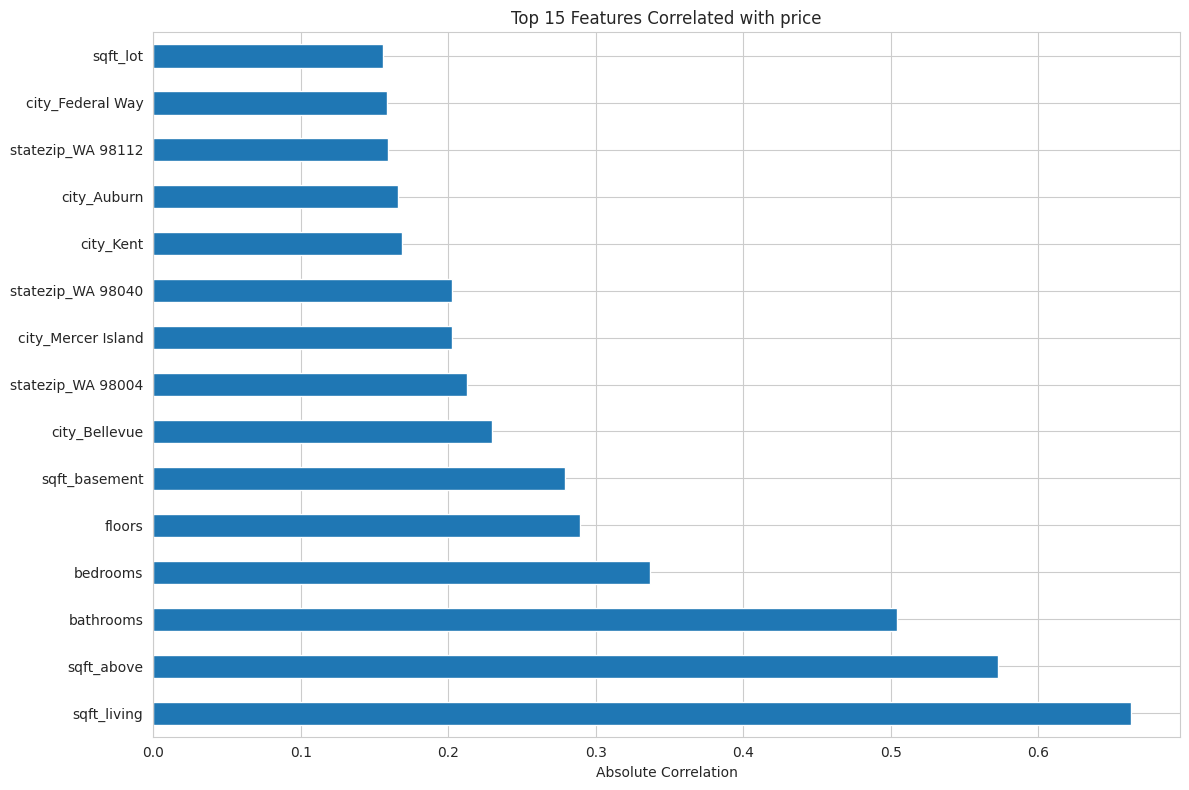

In [19]:
print("="*80)
print("FEATURE SELECTION - CORRELATION WITH TARGET")
print("="*80)

# Calculate correlation with target
feature_cols = [col for col in df_encoded.columns if col != target_col]
correlations = df_encoded[feature_cols + [target_col]].corr()[target_col].drop(target_col)
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("\nTop 15 features by correlation with target:")
display(correlations_sorted.head(15))

# Visualize top correlations
plt.figure(figsize=(12, 8))
correlations_sorted.head(15).plot(kind='barh')
plt.xlabel('Absolute Correlation')
plt.title(f'Top 15 Features Correlated with {target_col}')
plt.tight_layout()
plt.show()

In [20]:
print("="*80)
print("FEATURE SELECTION - SELECTKBEST")
print("="*80)

X_temp = df_encoded.drop(columns=[target_col])
y_temp = df_encoded[target_col]

# Select top K features
k = min(15, len(X_temp.columns))
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_temp, y_temp)

# Get selected features
feature_scores = pd.DataFrame({
    'Feature': X_temp.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(f"\nTop {k} features by SelectKBest:")
display(feature_scores.head(k))

selected_features = feature_scores.head(k)['Feature'].tolist()
print(f"\nSelected features: {selected_features}")


FEATURE SELECTION - SELECTKBEST

Top 15 features by SelectKBest:


,Feature,Score
2,sqft_living,3606.692417
8,sqft_above,2243.071010
1,bathrooms,1566.616015
0,bedrooms,587.659651
4,floors,420.263780
9,sqft_basement,388.170861
4607,city_Bellevue,256.552436
4650,statezip_WA 98004,218.376123
4627,city_Mercer Island,196.692663
4672,statezip_WA 98040,196.692663



Selected features: ['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors', 'sqft_basement', 'city_Bellevue', 'statezip_WA 98004', 'city_Mercer Island', 'statezip_WA 98040', 'city_Kent', 'city_Auburn', 'statezip_WA 98112', 'city_Federal Way', 'sqft_lot']


In [21]:
print("="*80)
print("DEFINE FEATURES (X) AND TARGET (y)")
print("="*80)

# Define X and y
X = df_encoded[selected_features]
y = df_encoded[target_col]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

print(f"\nFeatures in X: {X.columns.tolist()}")
print(f"\nTarget variable: {target_col}")

DEFINE FEATURES (X) AND TARGET (y)
Features (X) shape: (4600, 15)
Target (y) shape: (4600,)

Features in X: ['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors', 'sqft_basement', 'city_Bellevue', 'statezip_WA 98004', 'city_Mercer Island', 'statezip_WA 98040', 'city_Kent', 'city_Auburn', 'statezip_WA 98112', 'city_Federal Way', 'sqft_lot']

Target variable: price


In [22]:
print("="*80)
print("TRAIN-TEST SPLIT (80-20)")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

TRAIN-TEST SPLIT (80-20)
Training set size: 3680 samples (80.0%)
Test set size: 920 samples (20.0%)

X_train shape: (3680, 15)
X_test shape: (920, 15)
y_train shape: (3680,)
y_test shape: (920,)


In [23]:
print("="*80)
print("FEATURE SCALING - STANDARDSCALER")
print("="*80)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✓ Features scaled using StandardScaler!")
print(f"\nX_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

print("\nScaled features - First 5 rows of training set:")
display(X_train_scaled.head())

FEATURE SCALING - STANDARDSCALER
✓ Features scaled using StandardScaler!

X_train_scaled shape: (3680, 15)
X_test_scaled shape: (920, 15)

Scaled features - First 5 rows of training set:


,sqft_living,sqft_above,bathrooms,bedrooms,floors,sqft_basement,city_Bellevue,statezip_WA 98004,city_Mercer Island,statezip_WA 98040,city_Kent,city_Auburn,statezip_WA 98112,city_Federal Way,sqft_lot
1898,0.754783,1.202046,0.500703,0.722062,0.910403,-0.70362,-0.254588,-0.125431,-0.134092,-0.134092,-0.207567,-0.195895,-0.123176,-0.185173,2.053178
1370,1.845274,2.385171,1.190100,0.722062,0.910403,-0.70362,-0.254588,-0.125431,-0.134092,-0.134092,-0.207567,-0.195895,-0.123176,-0.185173,2.053178
3038,0.800698,1.251862,0.500703,0.722062,0.910403,-0.70362,-0.254588,-0.125431,-0.134092,-0.134092,-0.207567,-0.195895,-0.123176,-0.185173,0.402831
2361,2.201119,2.690293,2.051846,0.722062,0.910403,-0.70362,-0.254588,-0.125431,-0.134092,-0.134092,-0.207567,-0.195895,-0.123176,-0.185173,0.343373
156,-0.129089,0.243092,-0.188694,-0.445676,0.910403,-0.70362,-0.254588,-0.125431,-0.134092,-0.134092,-0.207567,-0.195895,-0.123176,-0.185173,-0.362698


In [24]:
print("="*80)
print("FINAL DATASET SUMMARY")
print("="*80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  - Original shape: {df.shape}")
print(f"  - Cleaned shape: {df_cleaned.shape}")
print(f"  - Encoded shape: {df_encoded.shape}")
print(f"  - Final features: {len(selected_features)}")

print(f"\n📋 DATA SPLIT:")
print(f"  - Training samples: {X_train_scaled.shape[0]}")
print(f"  - Test samples: {X_test_scaled.shape[0]}")
print(f"  - Number of features: {X_train_scaled.shape[1]}")

print(f"\n✅ DATA READY FOR MODELING!")
print(f"\nVariables available:")
print(f"  - X_train_scaled: Training features (scaled)")
print(f"  - X_test_scaled: Test features (scaled)")
print(f"  - y_train: Training target")
print(f"  - y_test: Test target")
print(f"  - scaler: Fitted StandardScaler object")

FINAL DATASET SUMMARY

📊 DATASET OVERVIEW:
  - Original shape: (4600, 18)
  - Cleaned shape: (4600, 18)
  - Encoded shape: (4600, 4725)
  - Final features: 15

📋 DATA SPLIT:
  - Training samples: 3680
  - Test samples: 920
  - Number of features: 15

✅ DATA READY FOR MODELING!

Variables available:
  - X_train_scaled: Training features (scaled)
  - X_test_scaled: Test features (scaled)
  - y_train: Training target
  - y_test: Test target
  - scaler: Fitted StandardScaler object


In [25]:
print("="*80)
print("SAVE PREPROCESSED DATA")
print("="*80)

# Save to CSV
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("✓ Preprocessed data saved successfully!")
print("  - X_train_scaled.csv")
print("  - X_test_scaled.csv")
print("  - y_train.csv")
print("  - y_test.csv")


SAVE PREPROCESSED DATA
✓ Preprocessed data saved successfully!
  - X_train_scaled.csv
  - X_test_scaled.csv
  - y_train.csv
  - y_test.csv


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
models = {
    "Simple Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Elastic Net Regression": ElasticNet(alpha=0.01, l1_ratio=0.5)
}

In [32]:
for name, model in models.items():
    print(f"\n {name}")

    model.fit(X_train_scaled, y_train)       
    y_pred = model.predict(X_test_scaled)    

    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))



 Simple Linear Regression
MSE: 33652399071.12343
R2 Score: 0.5129181777913511

 Ridge Regression
MSE: 33649182281.47293
R2 Score: 0.5129647373178001

 Lasso Regression
MSE: 33652399012.511967
R2 Score: 0.5129181786396881

 Elastic Net Regression
MSE: 33630101226.204502
R2 Score: 0.5132409148096386
